<a href="https://colab.research.google.com/github/dantedellatogna/deepfake_image_detection/blob/main/deepfake_prototypeV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir drive\Real
!mkdir drive\Fake

In [ ]:
!rm -r sample_data/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


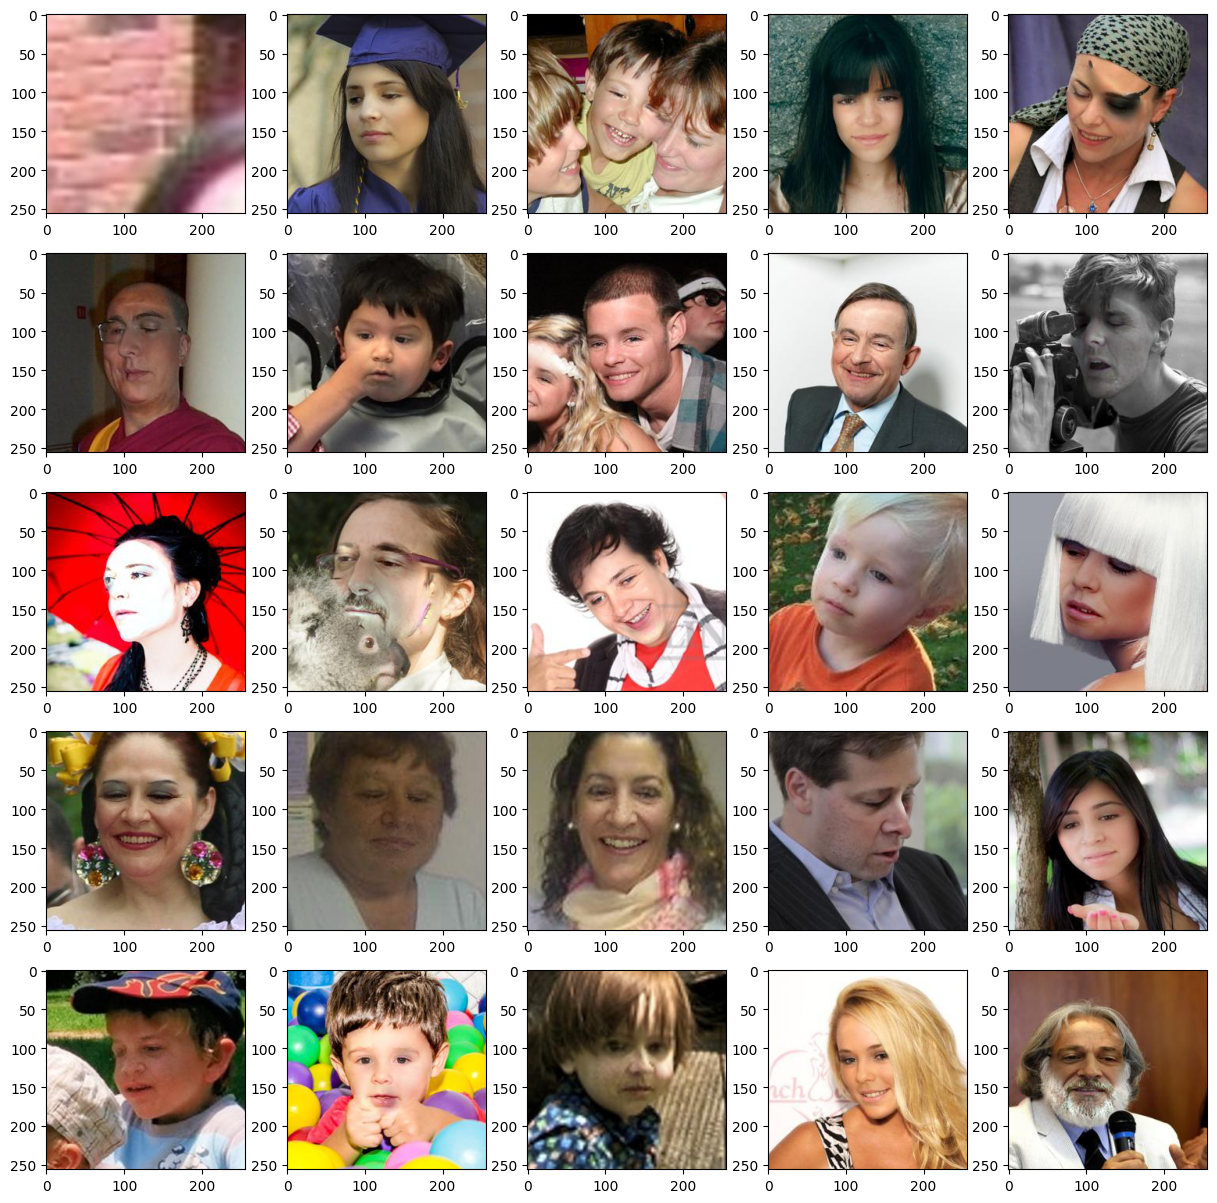

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))
carpeta = 'drive/MyDrive/Proyecto/dataset/Fake'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

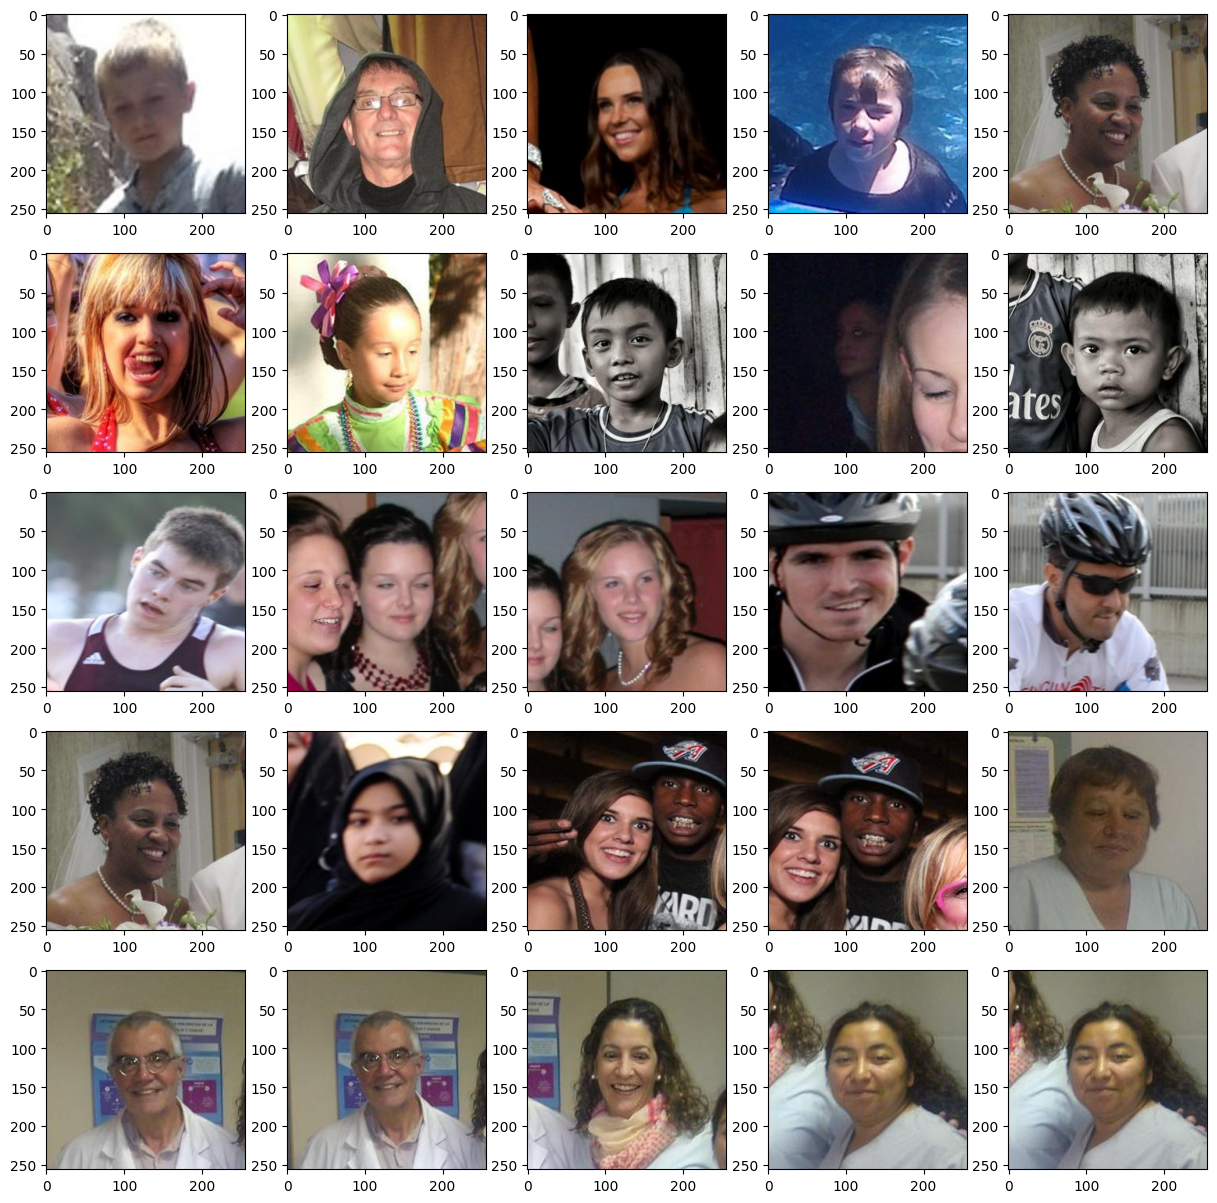

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))
carpeta = 'drive/MyDrive/Proyecto/dataset/Real'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Found 634 images belonging to 2 classes.
Found 158 images belonging to 2 classes.


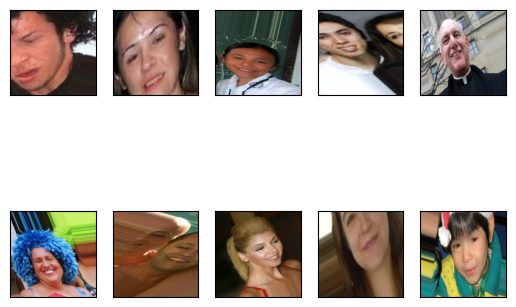

In [ ]:
from traitlets.traitlets import validate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(
    rescale = 1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split = 0.2
)

data_gen_entrenamiento = datagen.flow_from_directory('drive/MyDrive/Proyecto/dataset', target_size=(224,224),batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('drive/MyDrive/Proyecto/dataset', target_size=(224,224),batch_size=32, shuffle=True, subset='validation')

for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [ ]:
mobilenetv2.trainable = False

In [ ]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
modelo.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
EPOCAS = 1000
historial = modelo.fit(
    data_gen_entrenamiento, epochs = EPOCAS, batch_size=32,
    validation_data = data_gen_pruebas
)

Epoch 1/1000
20/20 [==============================] - 24s 680ms/step - loss: 0.4391 - accuracy: 0.8502 - val_loss: 0.4154 - val_accuracy: 0.8734
Epoch 2/1000
20/20 [==============================] - 14s 719ms/step - loss: 0.3641 - accuracy: 0.8691 - val_loss: 0.4217 - val_accuracy: 0.8734
Epoch 3/1000
20/20 [==============================] - 12s 605ms/step - loss: 0.3189 - accuracy: 0.8833 - val_loss: 0.3356 - val_accuracy: 0.8734
Epoch 4/1000
20/20 [==============================] - 12s 611ms/step - loss: 0.3011 - accuracy: 0.8754 - val_loss: 0.3096 - val_accuracy: 0.8987
Epoch 5/1000
20/20 [==============================] - 12s 604ms/step - loss: 0.2661 - accuracy: 0.9006 - val_loss: 0.3032 - val_accuracy: 0.8924
Epoch 6/1000
20/20 [==============================] - 12s 610ms/step - loss: 0.2575 - accuracy: 0.9038 - val_loss: 0.3077 - val_accuracy: 0.8924
Epoch 7/1000
20/20 [==============================] - 12s 600ms/step - loss: 0.2600 - accuracy: 0.8927 - val_loss: 0.2884 - val_ac

KeyboardInterrupt: ignored

In [ ]:
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']
loss = historial.history['loss']
val_loss = historial.history['val_loss']
rango_epocas = range(100)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss,label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss,label='Pérdidas de pruebas')
plt.legend(loc='upper right')
plt.legend('Perdida de entrenamiento y pruebas')
plt.show()

NameError: ignored

In [ ]:
modelo.evaluate(data_gen_pruebas, return_dict=True)

2/2 [==============================] - 1s 99ms/step - loss: 0.4908 - accuracy: 0.7000


{'loss': 0.4907926023006439, 'accuracy': 0.699999988079071}

#Guardar modelo

In [ ]:
modelo.save('/content/drive/MyDrive/Proyecto/Modelo_Guardado')

# Cargar modelo

In [ ]:
import tensorflow as tf
modelo =  tf.keras.models.load_model('/content/drive/MyDrive/Proyecto/Modelo_Guardado')
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


# Matriz de Confusión

In [ ]:
data_gen_test = datagen.flow_from_directory('drive/MyDrive/Proyecto/test_dataset', target_size=(224,224),batch_size=32, shuffle=True)

Found 201 images belonging to 2 classes.


In [ ]:
total_muestras = len(data_gen_pruebas.labels)
total_muestras

40

In [ ]:
batch_size = total_muestras

In [ ]:
y_pred = modelo.predict(data_gen_pruebas, batch_size=batch_size)
y_pred = np.argmax(y_pred, axis=1)

2/2 [==============================] - 1s 143ms/step


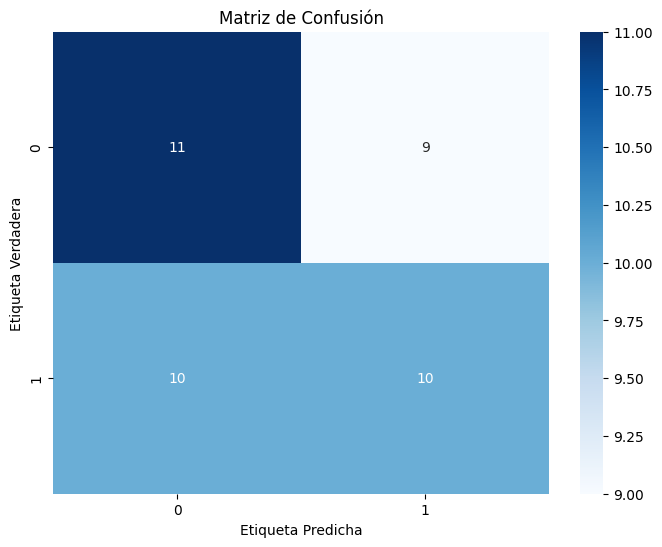

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

y_true = []
#for _, etiqueta in data_gen_pruebas:
#    y_true.extend(np.argmax(etiqueta, axis=1))
#    if len(y_true) >= len(data_gen_pruebas):
#        break

#y_pred = modelo.predict(data_gen_pruebas)
#y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(data_gen_pruebas.labels[:total_muestras], y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

# Probar el modelo

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img,(224,224))
  prediccion = modelo.predict(img.reshape(-1,224, 224, 3))
  return np.argmax(prediccion[0],axis=-1)

1/1 [==============================] - 8s 8s/step


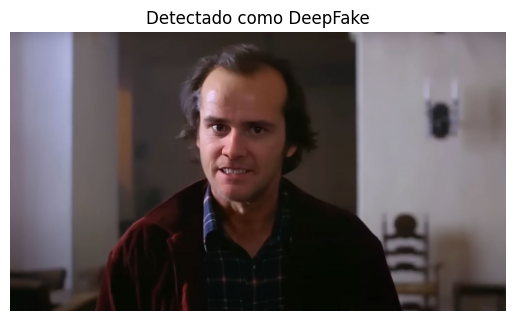

In [ ]:
import urllib.request
import matplotlib.pyplot as plt
from PIL import Image
import io
import numpy as np

url = 'https://cdn.mos.cms.futurecdn.net/xwk66FPAKm63fXsgJSoucn-1200-80.jpg'
response = requests.get(url)
imagen_data = response.content

imagen = Image.open(io.BytesIO(imagen_data))
prediccion = categorizar(url)
if prediccion == 0:
  plt.imshow(imagen)
  plt.axis('off')
  plt.title("Detectado como Real")
  plt.show()
else:
  plt.imshow(imagen)
  plt.axis('off')
  plt.title("Detectado como DeepFake")
  plt.show()